In [6]:
# Make the imports
import requests
import pandas as pd
pd.set_option("display.max_rows", 10)
import folium
import json
import math
from urllib.parse import urlencode
print('Setup complete')

Setup complete


## Part 1:
#### Reading the info from Google Maps

In [24]:
# Define the request parameters
api_key = 'Introduce your API key'
output_data_type = 'json'
base_endpoint = f'https://maps.googleapis.com/maps/api/place/findplacefromtext/{output_data_type}'
input_type = 'textquery'
fields = 'place_id,formatted_address,name,rating,opening_hours,geometry'
location_bias = f'circle:30000@40.7505045,-73.9934387' # The center of the circle is the Empire State Building

In [31]:
# Request the inputs from the user and build the famous places list
famous_places_info = list()

# We will start a loop prompting the user for the places they would like to visit in NYC, and getting the request for each place
# until the user wants to enter no more places.
while 1:
    # First we are going to promt the user for a place they would like to visit, and store it as the final parameter for the URL
    _input = input('Type a place you would like to visit in New York: ')
    
    # Now we can build a dictionary with the necessary parameters to build the URL for the request and properly encode it
    params = {
    'key': api_key,
    'input': _input,
    'inputtype': input_type,
    'fields': fields,
    'locationbias': location_bias
    }
    params_encoded = urlencode(params)
    
    # Build and make the request, and get the response
    url = f'{base_endpoint}?{params_encoded}'
    response = requests.get(url)
    
    # Check we got a good response
    if response.status_code not in range(200, 299):
        print('Invalid Request')
    else:
        # Save the info of the place
        famous_place_info = dict()
        famous_place_info['place_id'] = response.json()['candidates'][0]['place_id']
        famous_place_info['rating'] = response.json()['candidates'][0]['rating']
        famous_place_info['name'] = response.json()['candidates'][0]['name']
        famous_place_info['lat'] = response.json()['candidates'][0]['geometry']['location'].get('lat')
        famous_place_info['lon'] = response.json()['candidates'][0]['geometry']['location'].get('lng')
        famous_place_info['address'] = response.json()['candidates'][0]['formatted_address']
        
        # And finally store it into the famous places list
        famous_places_info.append(famous_place_info)
        
    # Promt the user whether they would like to enter another place
    y_n = input('Would yo like to visit another place?(y/n) ')
    
    if y_n == 'n':
        break

Type a place you would like to visit in New York: empire state
Would yo like to visit another place?(y/n) y
Type a place you would like to visit in New York: madison square garden
Would yo like to visit another place?(y/n) y
Type a place you would like to visit in New York: bryant park
Would yo like to visit another place?(y/n) y
Type a place you would like to visit in New York: koront pizza
Would yo like to visit another place?(y/n) amity hall
Type a place you would like to visit in New York: amity hall
Would yo like to visit another place?(y/n) y
Type a place you would like to visit in New York: washington bridge
Would yo like to visit another place?(y/n) n


In [34]:
# Take a look at the stored info of these places
famous_places_info

[{'place_id': 'ChIJaXQRs6lZwokRY6EFpJnhNNE',
  'rating': 4.7,
  'name': 'Empire State Building',
  'lat': 40.7484405,
  'lon': -73.98566439999999,
  'address': '20 W 34th St., New York, NY 10001, Estados Unidos'},
 {'place_id': 'ChIJhRwB-yFawokR5Phil-QQ3zM',
  'rating': 4.7,
  'name': 'Madison Square Garden',
  'lat': 40.7505045,
  'lon': -73.9934387,
  'address': '4 Pennsylvania Plaza, New York, NY 10001, Estados Unidos'},
 {'place_id': 'ChIJvbGg56pZwokRp_E3JbivnLQ',
  'rating': 4.7,
  'name': 'Bryant Park',
  'lat': 40.7535965,
  'lon': -73.9832326,
  'address': 'New York, NY 10018, Estados Unidos'},
 {'place_id': 'ChIJIbOVdzv2wokRBGLNSQMk2FI',
  'rating': 4.5,
  'name': 'Koronet Pizza',
  'lat': 40.8044028,
  'lon': -73.9661071,
  'address': '2848 Broadway, New York, NY 10025, Estados Unidos'},
 {'place_id': 'ChIJbQ6kSgH3wokRHPZKLZ--XiM',
  'rating': 4.3,
  'name': 'Amity Hall Uptown',
  'lat': 40.8022664,
  'lon': -73.96465409999999,
  'address': '982 Amsterdam Ave, New York, NY 10

In [35]:
# Define the function to map lat lon to distance
def get_distance(lat1,lon1,lat2,lon2):
    return math.sqrt(((lat1-lat2)*111)**2 + ((lon1-lon2)*111)**2)

In [36]:
# And build the list of distances between the famous places
famous_places_distances = list()
for i in range(len(famous_places_info)):
    for j in range(len(famous_places_info)):
        if i < j:
            famous_places_distances.append((famous_places_info[i]['name'],famous_places_info[j]['name'],get_distance(famous_places_info[i]['lat'],famous_places_info[i]['lon'],famous_places_info[j]['lat'],famous_places_info[j]['lon'])))

In [38]:
# Take a look at these distances
famous_places_distances

[('Empire State Building', 'Madison Square Garden', 0.8928419151197731),
 ('Empire State Building', 'Bryant Park', 0.6327777657153959),
 ('Empire State Building', 'Koronet Pizza', 6.580219127310341),
 ('Empire State Building', 'Amity Hall Uptown', 6.413706614152585),
 ('Empire State Building', 'Washington Bridge', 12.649125114593739),
 ('Madison Square Garden', 'Bryant Park', 1.1837250528099057),
 ('Madison Square Garden', 'Koronet Pizza', 6.707967132668688),
 ('Madison Square Garden', 'Amity Hall Uptown', 6.574206333021842),
 ('Madison Square Garden', 'Washington Bridge', 12.91719664624922),
 ('Bryant Park', 'Koronet Pizza', 5.951259456663317),
 ('Bryant Park', 'Amity Hall Uptown', 5.782577816509986),
 ('Bryant Park', 'Washington Bridge', 12.019058047981868),
 ('Koronet Pizza', 'Amity Hall Uptown', 0.286788729557969),
 ('Koronet Pizza', 'Washington Bridge', 6.322867814459013),
 ('Amity Hall Uptown', 'Washington Bridge', 6.397049018675964)]

## Part 2:
#### Introducing the NYC Airbnb lisitngs

In [39]:
# Read the listings csv
df = pd.read_csv('listings (2).csv')
# Build a reduced df with just the columns of interest for this analysis
red_df = df[['name', 'latitude', 'longitude', 'price', 'review_scores_rating', 'number_of_reviews']]
# Store the distances to the famous places
for item in famous_places_info:
    red_df['Distance to ' + item['name']] = red_df.apply(lambda x: get_distance(x['latitude'],x['longitude'],item['lat'],item['lon']), axis=1)

<ipython-input-39-1db7cd1e9d6f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df['Distance to ' + item['name']] = red_df.apply(lambda x: get_distance(x['latitude'],x['longitude'],item['lat'],item['lon']), axis=1)


In [42]:
red_df

name  latitude  longitude  \
0                                  Skylit Midtown Castle  40.75362  -73.98377   
1      Whole flr w/private bdrm, bath & kitchen(pls r...  40.68514  -73.95976   
2                                        BlissArtsSpace!  40.68688  -73.95596   
3                       Large Furnished Room Near B'way　  40.76468  -73.98315   
4                     Cozy Clean Guest Room - Family Apt  40.80178  -73.96723   
...                                                  ...       ...        ...   
36918  Gramercy Loft-Studio/Prime Location ~W&D in unit~  40.73961  -73.97971   
36919  Upper West Side Penthouse- Terrace & Hidden Ga...  40.78061  -73.98514   
36920                    Cozy shared room in East Harlem  40.80054  -73.93340   
36921                Boho Chic Rhapsody in New York City  40.74033  -73.98242   
36922        Modern 4 Bed W/ 5 Bath with Backyard Access  40.69648  -73.92707   

         price  review_scores_rating  number_of_reviews  \
0      $175.00                  94.0                 48   
1       $74.00                  89.0                375   
2       $60.00                  90.0                 50   
3       $65.00                  84.0                474   
4       $75.00                  98.0                118   
...        ...                   ...                ...   
36918  $199.00                   NaN                  0   
36919  $205.00                   NaN                  0   
36920   $35.00                   NaN                  0   
36921  $295.00                   NaN                  0   
36922  $500.00                   NaN                  0   

       Distance to Empire State Building  Distance to Madison Square Garden  \
0                               0.612173                           1.127566   
1                               7.591938                           8.161914   
2                               7.587113                           8.196529   
3                               1.824063                           1.944250   
4                               6.264305                           6.391974   
...                                  ...                                ...   
36918                           1.182203                           1.945407   
36919                           3.571289                           3.466346   
36920                           8.191413                           8.675200   
36921                           0.969624                           1.664749   
36922                           8.692935                           9.499065   

       Distance to Bryant Park  Distance to Koronet Pizza  \
0                     0.059708                   5.968117   
1                     8.032946                  13.256905   
2                     8.000387                  13.093565   
3                     1.230303                   4.797924   
4                     5.635623                   0.316690   
...                        ...                        ...   
36918                 1.600984                   7.348792   
36919                 3.005964                   3.382038   
36920                 7.599229                   3.655720   
36921                 1.475341                   7.338967   
36922                 8.891462                  12.739022   

       Distance to Amity Hall Uptown  Distance to Washington Bridge  
0                           5.801691                      12.047379  
1                          13.012375                      18.278009  
2                          12.844196                      18.010988  
3                           4.649874                      10.973993  
4                           0.290978                       6.623341  
...                              ...                            ...  
36918                       7.152832                      13.202814  
36919                       3.308976                       9.701066  
36920                       3.474494                      

In [43]:
# Store the price of the listings in a new column as a float
def price_to_float(price):
    price = float(price[1:].replace(',',''))
    return price

red_df['float_price'] = red_df.apply(lambda x: price_to_float(x['price']), axis=1)

<ipython-input-43-81d4846f989d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df['float_price'] = red_df.apply(lambda x: price_to_float(x['price']), axis=1)


In [45]:
# Prompt the user for filters on distance, price, rating, and number of reviews
max_price = float(input('Please, introduce the maximum price: '))
min_rating = float(input('Please introduce the minimum rating (0-100): '))
min_n_reviews = float(input('Please introduce the minimum number of reviews: '))
origin_famous_place = 'Distance to ' + input('Please introduce the place you want to stay closeby (Exactly as it is stored. See above in the code): ')
max_distance = float(input('Please introduce the maximum distance you want to stay from that place: '))

Please, introduce the maximum price: 100
Please introduce the minimum rating (0-100): 95
Please introduce the minimum number of reviews: 50
Please introduce the place you want to stay closeby (Exactly as it is stored. See above in the code): Empire State Building
Please introduce the maximum distance you want to stay from that place: 0.8


In [46]:
# To build the new filtered df, we first define a logic function to check whether the listing passes each filter
def passes_filters(price,rating,reviews,distance):
    a = False
    b = False
    c = False
    d = False
    sol = False
    
    if price <= max_price:
        a = True
    if rating >= min_rating:
        b = True
    if reviews >= min_n_reviews:
        c = True
    if distance <= max_distance:
        d = True
    if a & b & c & d:
        sol = True
    return sol

In [47]:
# And finally, we pass each listing through the filtering funciton
red_df['passed_filter'] = red_df.apply(lambda x: passes_filters(x['float_price'],x['review_scores_rating'],x['number_of_reviews'],x[origin_famous_place]), axis=1)
filtered_df = red_df[red_df['passed_filter']==True]

<ipython-input-47-d0057b21a22d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df['passed_filter'] = red_df.apply(lambda x: passes_filters(x['float_price'],x['review_scores_rating'],x['number_of_reviews'],x[origin_famous_place]), axis=1)


In [49]:
# The final set of listings is the following
filtered_df

name  latitude  longitude  \
281                              Midtown cozy convenient  40.74630  -73.97926   
16273     Stunning Room, Perfect Location, Premium Bed ❤  40.74596  -73.98669   
16275           Cute Quiet Room in the BEST Location!! ❤  40.74546  -73.98708   
18646        Cozy feel at home (female only)share studio  40.74572  -73.97993   
22264  Best Location in Luxury Building near Times Sq...  40.74837  -73.98703   

        price  review_scores_rating  number_of_reviews  \
281    $68.00                  97.0                134   
16273  $80.00                  97.0                100   
16275  $75.00                  95.0                108   
18646  $65.00                  99.0                 59   
22264  $91.00                  95.0                 66   

       Distance to Empire State Building  Distance to Madison Square Garden  \
281                             0.749542                           1.641575   
16273                           0.297942                           0.903116   
16275                           0.366255                           0.900948   
18646                           0.704517                           1.590737   
22264                           0.151783                           0.749784   

       Distance to Bryant Park  Distance to Koronet Pizza  \
281                   0.922172                   6.612595   
16273                 0.930480                   6.877717   
16275                 0.999032                   6.944482   
18646                 0.948036                   6.692061   
22264                 0.717103                   6.639101   

       Distance to Amity Hall Uptown  Distance to Washington Bridge  \
281                         6.420340                      12.515545   
16273                       6.711592                      12.944264   
16275                       6.779082                      13.014016   
18646                       6.501652                      12.606766   
22264                       6.477592                      12.733259   

       float_price  passed_filter  
281           68.0           True  
16273         80.0           True  
16275         75.0           True  
18646         65.0           True  
22264         91.0           True

## Part 3:
#### Building the Network

In [50]:
# Make the imports
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Reset index of the filtered df to build the network
filtered_dff =filtered_df.reset_index()

# Building the list of distances from the listings to the famous places
listings_distances = list()
for i in range(len(filtered_dff['name'])):
    for j in range(len(famous_places_info)):
        listings_distances.append([filtered_dff.loc[i,'name'],famous_places_info[j]['name'],filtered_dff.loc[i,'Distance to '+famous_places_info[j]['name']]])


In [53]:
listings_distances

[['Midtown cozy convenient', 'Empire State Building', 0.7495424863701858],
 ['Midtown cozy convenient', 'Madison Square Garden', 1.6415746202641928],
 ['Midtown cozy convenient', 'Bryant Park', 0.9221719605075805],
 ['Midtown cozy convenient', 'Koronet Pizza', 6.612595376699296],
 ['Midtown cozy convenient', 'Amity Hall Uptown', 6.420340409471771],
 ['Midtown cozy convenient', 'Washington Bridge', 12.51554509188679],
 ['Stunning Room, Perfect Location, Premium Bed ❤',
  'Empire State Building',
  0.297942188102346],
 ['Stunning Room, Perfect Location, Premium Bed ❤',
  'Madison Square Garden',
  0.903116027392593],
 ['Stunning Room, Perfect Location, Premium Bed ❤',
  'Bryant Park',
  0.9304802807749899],
 ['Stunning Room, Perfect Location, Premium Bed ❤',
  'Koronet Pizza',
  6.877716792206807],
 ['Stunning Room, Perfect Location, Premium Bed ❤',
  'Amity Hall Uptown',
  6.711592369262669],
 ['Stunning Room, Perfect Location, Premium Bed ❤',
  'Washington Bridge',
  12.944263545830184

In [54]:
# Constructing the network
trip_network=nx.Graph()
node_labels=dict()
nodes = list()
listing_nodes = list()
places_nodes= list()

for n in famous_places_info:
    nodes.append(n['name'])
    node_labels[n['name']] = n['name']
    places_nodes.append(n['name'])
for n in filtered_df['name']:
    nodes.append(n)
    node_labels[n] = n
    listing_nodes.append(n)
for e in listings_distances:
    trip_network.add_edge(e[0],e[1],distance=e[2])
for e in famous_places_distances:
    trip_network.add_edge(e[0],e[1],distance=e[2])
print(len(trip_network.edges()))
trip_network.edges(data = True)

45


EdgeDataView([('Midtown cozy convenient', 'Empire State Building', {'distance': 0.7495424863701858}), ('Midtown cozy convenient', 'Madison Square Garden', {'distance': 1.6415746202641928}), ('Midtown cozy convenient', 'Bryant Park', {'distance': 0.9221719605075805}), ('Midtown cozy convenient', 'Koronet Pizza', {'distance': 6.612595376699296}), ('Midtown cozy convenient', 'Amity Hall Uptown', {'distance': 6.420340409471771}), ('Midtown cozy convenient', 'Washington Bridge', {'distance': 12.51554509188679}), ('Empire State Building', 'Stunning Room, Perfect Location, Premium Bed ❤', {'distance': 0.297942188102346}), ('Empire State Building', 'Cute Quiet Room in the BEST Location!! ❤', {'distance': 0.36625464881599246}), ('Empire State Building', 'Cozy feel at home (female only)share studio', {'distance': 0.7045174775249874}), ('Empire State Building', 'Best Location in Luxury Building near Times Square', {'distance': 0.15178346388615263}), ('Empire State Building', 'Madison Square Garde

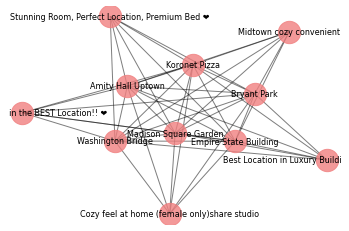

In [55]:
# Drawing the network
pos=nx.spring_layout(trip_network) # positions for all nodes

# nodes
nx.draw_networkx_nodes(trip_network,pos,
                       node_color='lightcoral',
                       node_size=500,
                      alpha=0.8)

# edges
nx.draw_networkx_edges(trip_network,pos,
                       edgelist=trip_network.edges(),
                       width=1,alpha=0.5)


node_name={}
for node in trip_network.nodes():
    node_name[node]=str(node)

node_name={}
for node in trip_network.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(trip_network,pos,node_name,font_size=8)

plt.axis('off')
plt.show() # display

In [57]:
# Getting the one listing with the shortest path to all places of interest in the trip
total_length = 1000
for listing in listing_nodes:
    length = 0
    for place in places_nodes:
        length += nx.dijkstra_path_length(trip_network,listing, place, weight='distance')
    if length < total_length:
        total_length = length
        best_listing = listing

best_listing_df = filtered_df[filtered_df.name == best_listing]
print('Your best option to stay is: {}, for a price of {}'.format(best_listing_df.iloc[0,0],best_listing_df.iloc[0,3]))
print('It has a rating of {}, {} total reviews, and the total trip distance to all places of your choosing is {}km'.format(best_listing_df.iloc[0,4],best_listing_df.iloc[0,5],total_length))

Your best option to stay is: Best Location in Luxury Building near Times Square, for a price of $91.00
It has a rating of 95.0, 66 total reviews, and the total trip distance to all places of your choosing is 27.468623139627084km


In [58]:
# Displaying the listing on the map along with all famous places
import folium
m = folium.Map(location=[40.8075,-73.9626],zoom_start=12)
for item in famous_places_info:
    folium.Marker([item['lat'],item['lon']],popup=item['name'],icon=folium.Icon(color='red')).add_to(m)
folium.Marker([best_listing_df.iloc[0,1],best_listing_df.iloc[0,2]],popup=best_listing,icon=folium.Icon(color='blue')).add_to(m)
m

In [59]:
print('Thanks for using our application! Have a wonderful visit to New York City!')

Thanks for using our application! Have a wonderful visit to New York City!
